In [1]:
cd ..

/home/msi/projects/diplomka


In [2]:
import pandas as pd
import glob
from datetime import datetime, timedelta
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
import seaborn as sns
import netgraph as ng
from collections import defaultdict
from hashlib import sha1
import json
import pandas as pd
import netgraph as ng

In [3]:
from trct import TraceMonitor

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

np.printoptions(precision=2)

sns.set_style("darkgrid")
sns.set_context("paper")

# Get files

In [5]:
dataset = 'FZK_LCCG2-INFN_T1'
dataset = 'CA_SFU_T2-CSCS_LCG2'

In [6]:
# files = sorted(glob.glob("data/sites/CA_SFU_T2-CSCS_LCG2/*.json"))
files = sorted(glob.glob(f"data/sites/{dataset}/*.json"))
len(files)

44635

In [7]:
with open(files[0], 'r') as f:
    data = json.load(f)

In [8]:
src, dest = data['src'], data['dest']

# Processing

In [9]:
files = sorted(
    # glob.glob("data/out/FZK_LCCG2-INF_T1/*.json")
    files
    )

In [10]:
with open(files[34840], "r") as f:
    json_data = json.load(f)

In [11]:
json_data

{'src': '206.12.127.40',
 'dest_site': 'CSCS-LCG2',
 'dest_VO': 'ATLAS',
 'src_VO': 'ATLAS',
 'created_at': '2023-03-14T09:17:29.340491198Z',
 'src_host': 'lcg-bw.sfu.computecanada.ca',
 'dest': '148.187.129.15',
 'push': False,
 'src_site': 'CA-SFU-T2',
 'ttls': [],
 'MA': '206.12.127.40',
 'rtts': [],
 'ipv6': False,
 'dest_host': 'perfsonar01.lcg.cscs.ch',
 'dest_production': True,
 'hops': [],
 'asns': [],
 'n_hops': 0,
 'src_production': True,
 'timestamp': 1678785080000}

In [12]:
ta = TraceMonitor(src, dest, dest_asn=0)

In [13]:
ta.process(files)

100%|██████████| 44635/44635 [00:20<00:00, 2229.33it/s]


In [14]:
meta_df = pd.read_csv(f"data/ip_metadata/{dataset}.csv")

In [15]:
meta_df[meta_df['ip'] == data['src']]

,ip,continent_code,continent_name,country_code2,country_name,state_prov,district,city,latitude,longitude,is_eu,isp,connection_type,organization,time_zone,message
0,206.12.127.40,NaN,North America,CA,Canada,British Columbia,NaN,Burnaby,49.28006,-122.90454,False,Simon Fraser University,NaN,Simon Fraser University,NaN,NaN


In [16]:
meta_df[meta_df['ip'] == data['dest']]

,ip,continent_code,continent_name,country_code2,country_name,state_prov,district,city,latitude,longitude,is_eu,isp,connection_type,organization,time_zone,message
14,148.187.129.15,EU,Europe,CH,Switzerland,Ticino,NaN,Lugano,46.02444,8.96008,False,Centro Svizzero di Calcolo Scientifico,NaN,SWITCH,NaN,NaN


In [17]:
ip_to_geo = meta_df[(meta_df['latitude'].notna())].set_index('ip')[['latitude', 'longitude']].apply(lambda x: np.array(tuple(x)), axis=1).to_dict()

In [18]:
pos = json.loads(ta.hops_ip_model.to_json(ip_to_geo))

missing: [1]
{0: array([-1.,  0.]), 1: array([-0.88378378,  0.        ]), 2: array([-0.76756757,  0.        ]), 3: array([-0.65135135,  0.        ]), 15: array([-0.53513514, -0.05810811]), 4: array([-0.53513514,  0.05810811]), 20: array([-0.41891892, -0.11621622]), 16: array([-0.41891892,  0.        ]), 5: array([-0.41891892,  0.11621622]), 21: array([-0.3027027 , -0.17432432]), 17: array([-0.3027027 , -0.05810811]), 7: array([-0.3027027 ,  0.05810811]), 6: array([-0.3027027 ,  0.17432432]), 22: array([-0.18648649, -0.11621622]), 18: array([-0.18648649,  0.        ]), 8: array([-0.18648649,  0.11621622]), 29: array([-0.07027027, -0.23243243]), 23: array([-0.07027027, -0.11621622]), 19: array([-0.07027027,  0.        ]), 10: array([-0.07027027,  0.11621622]), 9: array([-0.07027027,  0.23243243]), 30: array([ 0.04594595, -0.29054054]), 27: array([ 0.04594595, -0.17432432]), 25: array([ 0.04594595, -0.05810811]), 24: array([0.04594595, 0.05810811]), 12: array([0.04594595, 0.17432432]), 11

In [21]:
tmp.keys()

dict_keys(['node_mapping', 'edges', 'node_pos'])

In [24]:
import json
json.dumps(tmp, indent=4)

'{\n    "node_mapping": {\n        "0": "2a00:139c:5:585:0:41:2:12",\n        "1": "2a00:139c:5:585::3",\n        "2": "2001:1458:302:38::1",\n        "3": "2001:1458:302:27::2",\n        "4": "2001:760:ffff:110::25",\n        "5": "2001:760:4205:254::12",\n        "6": "192.108.47.3",\n        "7": "192.108.46.146",\n        "8": "188.1.153.1",\n        "9": "188.1.144.222",\n        "10": "62.40.126.184",\n        "11": "62.40.126.41",\n        "12": "62.40.126.202",\n        "13": "193.206.128.178",\n        "14": "131.154.254.12",\n        "15": "193.206.128.174",\n        "16": "131.154.254.11",\n        "17": "2001:760:4205:254::11",\n        "18": "2001:760:ffff:110::27",\n        "19": "62.40.126.186",\n        "20": "2001:1458:302:37::1",\n        "21": "192.108.46.243",\n        "22": "192.108.46.98",\n        "23": "188.1.233.165",\n        "24": "62.40.124.217",\n        "25": "62.40.98.181",\n        "26": "62.40.98.81",\n        "27": "2a00:139c:0:1::2",\n        "28": "2

In [17]:
# Burnaby
# Ottawa
# Cambridge
# Zurich
# Lugano

In [27]:
import pathlib


In [28]:
directory = pathlib.Path(f"/home/msi/projects/diplomka/results/benchmark/RTT")

'2a00:139c:5:585:0:41:2:12-2a00:139c:5:585::3'

In [41]:
for k, v in ta.rtt_models.items():
    filename = f"{v.u}-{v.v}.csv"
    if v.n < 100:
        continue
    v.to_frame()[['observed', 'anomalies']].reset_index().rename(columns={'index':'timestamp','observed': 'rtt', 'anomalies': 'normalmodel_anomalies'}).to_csv(directory/filename, index=False)


In [ ]:
# convert to dicst of lists
pos = (meta_df.set_index('ip')[['longitude', 'latitude']]
# .apply(lambda x: (x-x.min())/(x.max()-x.min()))
.to_dict(orient="index"))

In [ ]:
pos = {k: (v["longitude"], v["latitude"]) for k, v in pos.items()}

In [ ]:
final_pos = {}

In [ ]:
meta_df[meta_df['ip'] == '130.59.36.102']

,ip,continent_code,continent_name,country_code2,country_name,state_prov,district,city,latitude,longitude,is_eu,isp,connection_type,organization,time_zone,message
37,130.59.36.102,EU,Europe,CH,Switzerland,Zurich,NaN,Zurich,47.377,8.53977,False,SWITCH,NaN,SWITCH,NaN,NaN


In [ ]:
for i, n in enumerate(ta.hops_ip_model.nodes):
    print(i, n)
    final_pos[i] = pos.get(n)

0 206.12.127.40
1 10.192.0.42
2 134.87.2.171
3 205.189.32.172
4 205.189.32.175
5 205.189.32.234
6 205.189.32.239
7 205.189.32.210
8 205.189.32.119
9 62.40.124.221
10 62.40.98.238
11 62.40.124.22
12 130.59.38.70
13 148.187.0.2
14 148.187.129.15
15 205.189.32.8
16 205.189.32.3
17 205.189.32.189
18 205.189.32.161
19 205.189.32.60
20 205.189.32.177
21 205.189.32.61
22 205.189.32.89
23 62.40.124.241
24 62.40.98.244
25 62.40.98.65
26 62.40.98.107
27 62.40.98.106
28 62.40.98.64
29 205.189.32.193
30 62.40.124.225
31 130.59.36.70
32 130.59.37.154
33 130.59.37.145
34 130.59.36.246
35 130.59.38.201
36 130.59.39.150
37 130.59.36.102
38 148.187.0.10
39 130.59.38.53
40 130.59.38.77
41 130.59.38.206
42 130.59.38.73


In [ ]:
import folium

In [26]:
final_pos[1] = (
    (final_pos[0][0] + final_pos[2][0])/2, 
    (final_pos[0][1] + final_pos[2][1])/2
    )


NameError: name 'final_pos' is not defined

In [ ]:
ta.hops_ip_model.nodes.items()

odict_items([('206.12.127.40', 0), ('10.192.0.42', 1), ('134.87.2.171', 2), ('205.189.32.172', 3), ('205.189.32.175', 4), ('205.189.32.234', 5), ('205.189.32.239', 6), ('205.189.32.210', 7), ('205.189.32.119', 8), ('62.40.124.221', 9), ('62.40.98.238', 10), ('62.40.124.22', 11), ('130.59.38.70', 12), ('148.187.0.2', 13), ('148.187.129.15', 14), ('205.189.32.8', 15), ('205.189.32.3', 16), ('205.189.32.189', 17), ('205.189.32.161', 18), ('205.189.32.60', 19), ('205.189.32.177', 20), ('205.189.32.61', 21), ('205.189.32.89', 22), ('62.40.124.241', 23), ('62.40.98.244', 24), ('62.40.98.65', 25), ('62.40.98.107', 26), ('62.40.98.106', 27), ('62.40.98.64', 28), ('205.189.32.193', 29), ('62.40.124.225', 30), ('130.59.36.70', 31), ('130.59.37.154', 32), ('130.59.37.145', 33), ('130.59.36.246', 34), ('130.59.38.201', 35), ('130.59.39.150', 36), ('130.59.36.102', 37), ('148.187.0.10', 38), ('130.59.38.53', 39), ('130.59.38.77', 40), ('130.59.38.206', 41), ('130.59.38.73', 42)])

In [ ]:
import folium

In [25]:
tmp['node_pos']

{'0': [49.278059999999996, -122.90454],
 '1': [49.28165243243243, -123.11528],
 '2': [49.281884864864864, -123.11528],
 '3': [45.4198772972973, -75.69841],
 '4': [45.42010972972973, -75.69829378378378],
 '5': [45.420342162162164, -75.69817756756757],
 '6': [45.4205745945946, -75.69806135135134],
 '7': [45.4205745945946, -75.69829378378378],
 '8': [45.420807027027024, -75.69817756756757],
 '9': [52.19266945945946, 0.13360486486486486],
 '10': [52.19266945945946, 0.13337243243243244],
 '11': [52.19290189189189, 0.13372108108108108],
 '12': [47.377091891891894, 8.54011864864865],
 '13': [46.02476432432432, 8.960544864864865],
 '14': [46.02476432432432, 8.960312432432431],
 '15': [45.42010972972973, -75.69852621621621],
 '16': [45.420342162162164, -75.69841],
 '17': [45.4205745945946, -75.69852621621621],
 '18': [45.420807027027024, -75.69841],
 '19': [45.42103945945946, -75.69841],
 '20': [45.420342162162164, -75.69864243243242],
 '21': [45.4205745945946, -75.69875864864865],
 '22': [45.4

In [ ]:
final_pos

{0: (-122.90454, 49.28006),
 1: (-123.00990999999999, 49.28174),
 2: (-123.11528, 49.28342),
 3: (-75.69841, 45.42118),
 4: (-75.69841, 45.42118),
 5: (-75.69841, 45.42118),
 6: (-75.69841, 45.42118),
 7: (-75.69841, 45.42118),
 8: (-75.69841, 45.42118),
 9: (0.13314, 52.19281),
 10: (0.13314, 52.19281),
 11: (0.13314, 52.19281),
 12: (8.53977, 47.377),
 13: (8.96008, 46.02444),
 14: (8.96008, 46.02444),
 15: (-75.69841, 45.42118),
 16: (-75.69841, 45.42118),
 17: (-75.69841, 45.42118),
 18: (-75.69841, 45.42118),
 19: (-75.69841, 45.42118),
 20: (-75.69841, 45.42118),
 21: (-75.69841, 45.42118),
 22: (-75.69841, 45.42118),
 23: (0.13314, 52.19281),
 24: (0.13314, 52.19281),
 25: (0.13314, 52.19281),
 26: (0.13314, 52.19281),
 27: (0.13314, 52.19281),
 28: (0.13314, 52.19281),
 29: (-75.69841, 45.42118),
 30: (0.13314, 52.19281),
 31: (8.53977, 47.377),
 32: (8.53977, 47.377),
 33: (8.53977, 47.377),
 34: (8.53977, 47.377),
 35: (8.53977, 47.377),
 36: (8.53977, 47.377),
 37: (8.53977,

In [ ]:
meta_df.loc[(meta_df['ip']==ip)].iloc[0]

NameError: name 'ip' is not defined

In [ ]:
pos

{'206.12.127.40': (-122.90454, 49.28006),
 '10.192.0.42': (nan, nan),
 '134.87.2.171': (-123.11528, 49.28342),
 '205.189.32.172': (-75.69841, 45.42118),
 '205.189.32.175': (-75.69841, 45.42118),
 '205.189.32.234': (-75.69841, 45.42118),
 '205.189.32.239': (-75.69841, 45.42118),
 '205.189.32.210': (-75.69841, 45.42118),
 '205.189.32.119': (-75.69841, 45.42118),
 '62.40.124.221': (0.13314, 52.19281),
 '62.40.98.238': (0.13314, 52.19281),
 '62.40.124.22': (0.13314, 52.19281),
 '130.59.38.70': (8.53977, 47.377),
 '148.187.0.2': (8.96008, 46.02444),
 '148.187.129.15': (8.96008, 46.02444),
 '205.189.32.8': (-75.69841, 45.42118),
 '205.189.32.3': (-75.69841, 45.42118),
 '205.189.32.189': (-75.69841, 45.42118),
 '205.189.32.161': (-75.69841, 45.42118),
 '205.189.32.60': (-75.69841, 45.42118),
 '205.189.32.177': (-75.69841, 45.42118),
 '205.189.32.61': (-75.69841, 45.42118),
 '205.189.32.89': (-75.69841, 45.42118),
 '62.40.124.241': (0.13314, 52.19281),
 '62.40.98.244': (0.13314, 52.19281),
 '6

In [24]:
tmp['node_pos']

{'0': [49.278059999999996, -122.90454],
 '1': [49.28165243243243, -123.11528],
 '2': [49.281884864864864, -123.11528],
 '3': [45.4198772972973, -75.69841],
 '4': [45.42010972972973, -75.69829378378378],
 '5': [45.420342162162164, -75.69817756756757],
 '6': [45.4205745945946, -75.69806135135134],
 '7': [45.4205745945946, -75.69829378378378],
 '8': [45.420807027027024, -75.69817756756757],
 '9': [52.19266945945946, 0.13360486486486486],
 '10': [52.19266945945946, 0.13337243243243244],
 '11': [52.19290189189189, 0.13372108108108108],
 '12': [47.377091891891894, 8.54011864864865],
 '13': [46.02476432432432, 8.960544864864865],
 '14': [46.02476432432432, 8.960312432432431],
 '15': [45.42010972972973, -75.69852621621621],
 '16': [45.420342162162164, -75.69841],
 '17': [45.4205745945946, -75.69852621621621],
 '18': [45.420807027027024, -75.69841],
 '19': [45.42103945945946, -75.69841],
 '20': [45.420342162162164, -75.69864243243242],
 '21': [45.4205745945946, -75.69875864864865],
 '22': [45.4

In [ ]:
final_pos

{0: (-122.90454, 49.28006),
 1: (-123.00990999999999, 49.28174),
 2: (-123.11528, 49.28342),
 3: (-75.69841, 45.42118),
 4: (-75.69841, 45.42118),
 5: (-75.69841, 45.42118),
 6: (-75.69841, 45.42118),
 7: (-75.69841, 45.42118),
 8: (-75.69841, 45.42118),
 9: (0.13314, 52.19281),
 10: (0.13314, 52.19281),
 11: (0.13314, 52.19281),
 12: (8.53977, 47.377),
 13: (8.96008, 46.02444),
 14: (8.96008, 46.02444),
 15: (-75.69841, 45.42118),
 16: (-75.69841, 45.42118),
 17: (-75.69841, 45.42118),
 18: (-75.69841, 45.42118),
 19: (-75.69841, 45.42118),
 20: (-75.69841, 45.42118),
 21: (-75.69841, 45.42118),
 22: (-75.69841, 45.42118),
 23: (0.13314, 52.19281),
 24: (0.13314, 52.19281),
 25: (0.13314, 52.19281),
 26: (0.13314, 52.19281),
 27: (0.13314, 52.19281),
 28: (0.13314, 52.19281),
 29: (-75.69841, 45.42118),
 30: (0.13314, 52.19281),
 31: (8.53977, 47.377),
 32: (8.53977, 47.377),
 33: (8.53977, 47.377),
 34: (8.53977, 47.377),
 35: (8.53977, 47.377),
 36: (8.53977, 47.377),
 37: (8.53977,

In [ ]:
final_pos['62.40.98.106'] = pos['62.40.98.106']
final_pos['62.40.98.64'] = pos['62.40.98.64']


In [ ]:
for x in pos:
    if x not in final_pos:
        final_pos[x] = pos[x]

In [28]:
import folium

In [32]:
tmp['node_pos']

TypeError: 'GraphModel' object is not subscriptable

In [40]:
m = folium.Map(location=[46.02444, 8.96008], zoom_start=3, tiles="Stamen Terrain")


for ip, node_id in ta.hops_ip_model.nodes.items():
    
    row = meta_df.loc[(meta_df['ip']==ip)].iloc[0]
    folium.Marker(
    pos['node_pos'][str(node_id)], popup=row['isp'], tooltip=row['city']
).add_to(m)
for u,v in  ta.hops_ip_model.edges:
    if u==v:
        continue
    row_u = meta_df.loc[(meta_df['ip']==u)].iloc[0]
    row_v = meta_df.loc[(meta_df['ip']==v)].iloc[0]
    uid =  ta.hops_ip_model.node_to_index[u]
    vid =  ta.hops_ip_model.node_to_index[v]


    tmp = ta.hops_ip_model
    p = tmp.counts[u][v] / tmp.node_out_counts[u]

    folium.PolyLine(
    [ pos['node_pos'][str(uid)], pos['node_pos'][str(vid)]], color='yellow',  weight=5*p, tooltip=p, opacity=0.4


    ).add_to(m)


In [41]:
m

In [ ]:
m

/home/msi/miniconda3/envs/stats/lib/python3.10/site-packages/netgraph/_utils.py:396: RuntimeWarning: invalid value encountered in divide
  unit_vector = vector / np.linalg.norm(vector)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


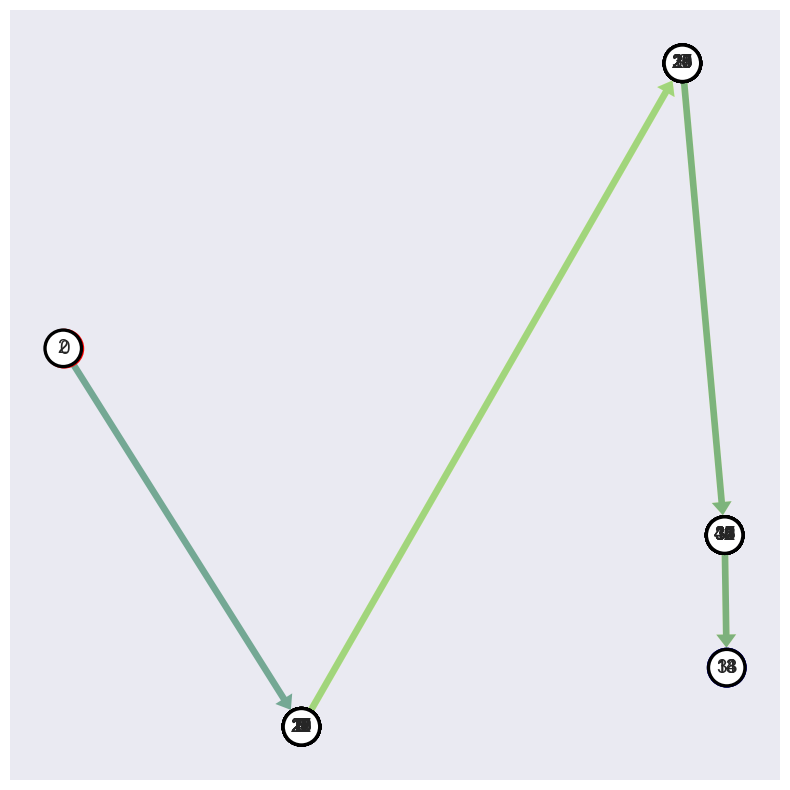

In [ ]:
fig = plt.figure(figsize=(10, 10))
ta.hops_ip_model.plot_graph(fig.gca(), node_layout=final_pos)

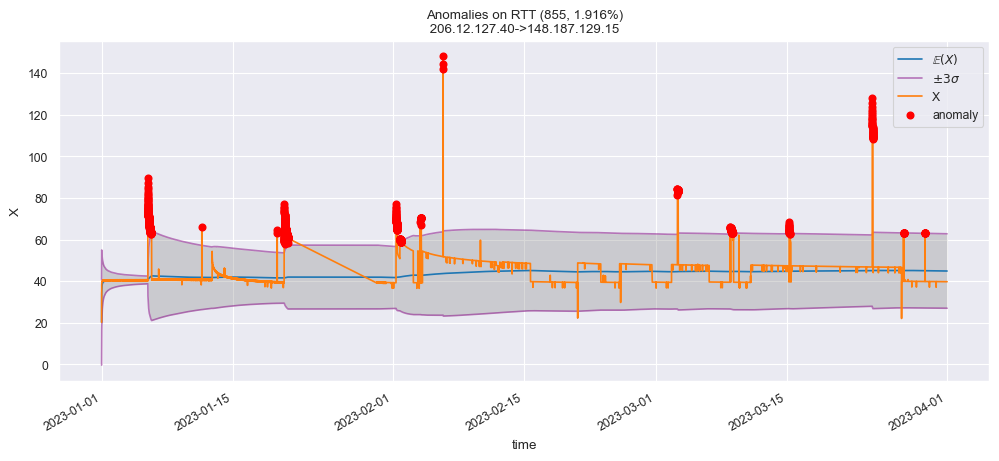

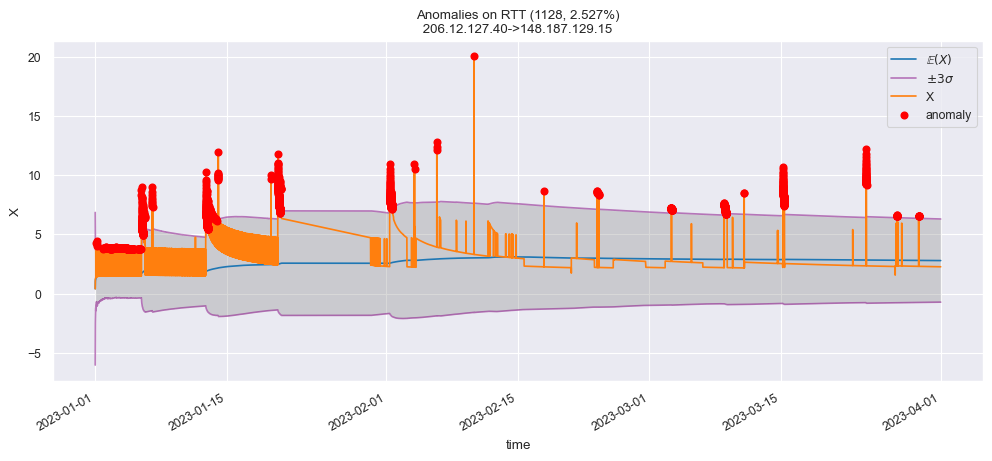

In [ ]:
# fig, (ax1, ax2) = plt.subplots( 2, 1, figsize=(12, 5))
fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
ta.hops_ip_model.global_anomaly_model.plot(ax)

fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
ta.hops_ip_model.local_anomaly_model.plot(ax)

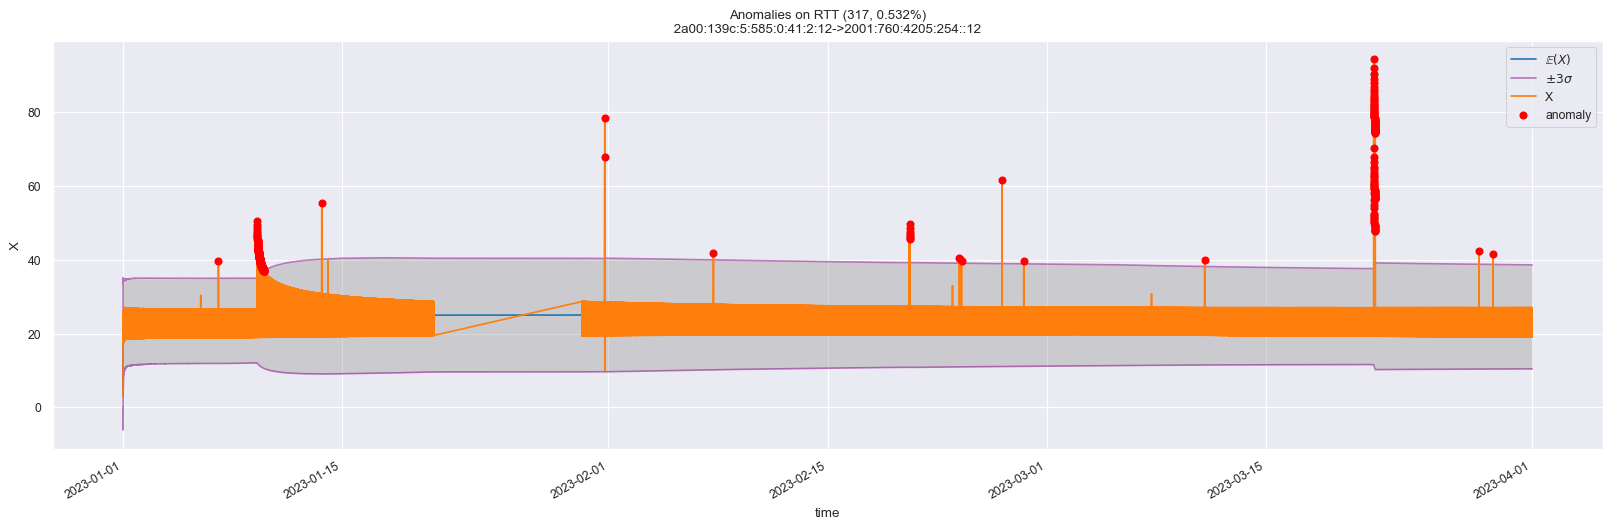

In [ ]:
fig=plt.figure(figsize=(20, 6))
ta.hops_ip_model.weighted_anomaly_model.plot(plt.gca())

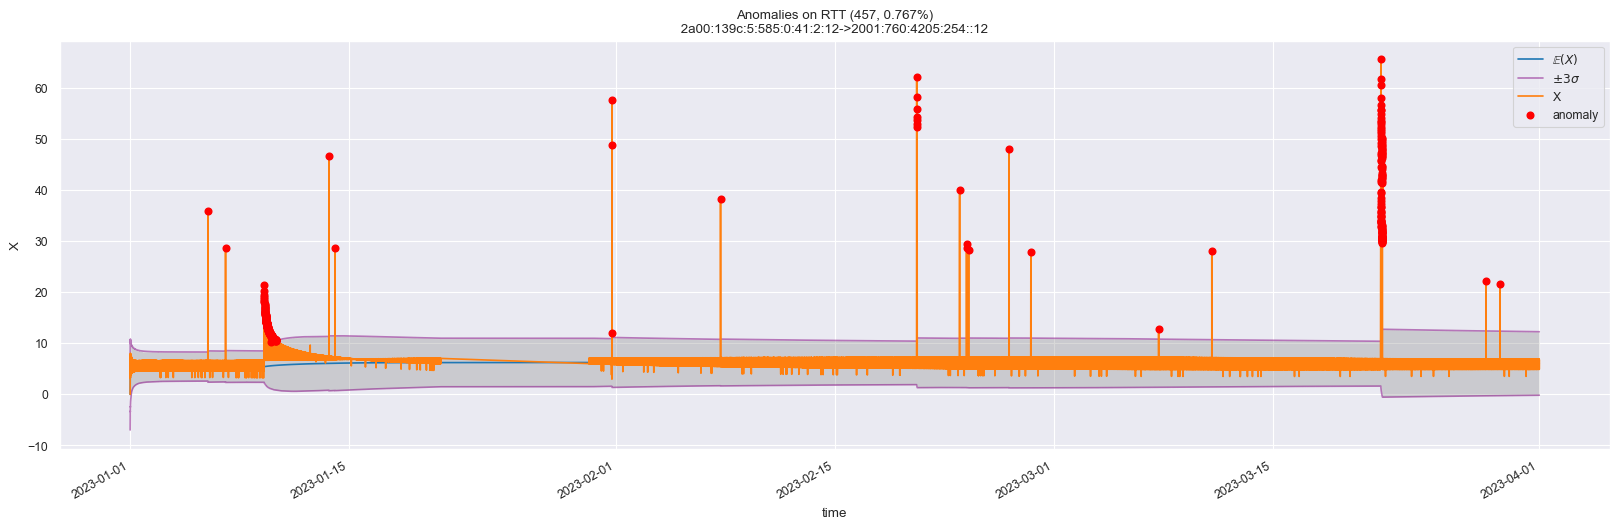

In [ ]:
fig=plt.figure(figsize=(20, 6))
ta.hops_ip_model.node_prob_edge_prob.plot(plt.gca())

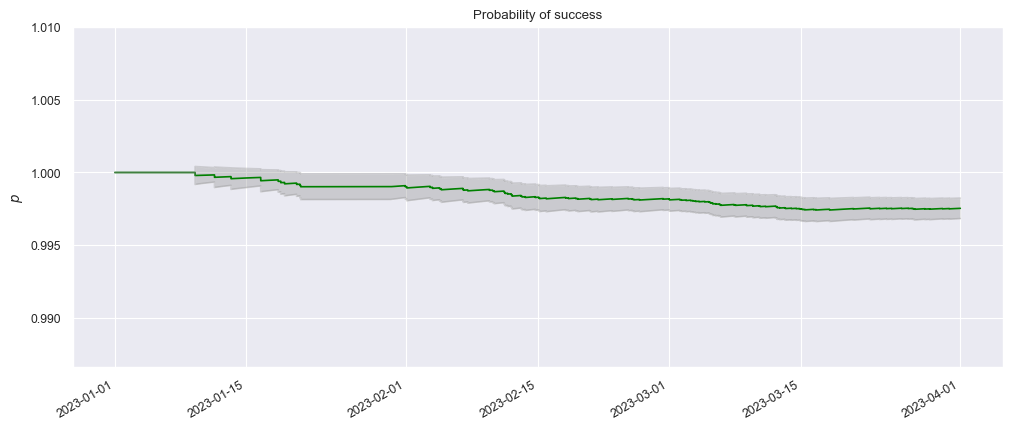

In [ ]:
fig = plt.figure(figsize=(12, 5))
ta.destination_reached_model.plot(plt.gca())

In [ ]:
import netgraph as ng

In [ ]:
g = ta.hops_ip_model.to_graph()

In [ ]:
import networkx as nx

In [ ]:
current = 0

def increment():
    global current
    current += 1
    return current

In [ ]:
depths = defaultdict(lambda : 0) # default value is current

In [ ]:
g.nodes[0]['d'] = 0

In [ ]:
for src, items in nx.algorithms.traversal.bfs_successors(g,0):
    depth = depths[src]
    for dest in items:
        depths[dest] = depth + 1
        # g.edges[(src, dest)]['l'] = depths[dest]
        g.nodes[dest]['d'] = depths[dest]

In [ ]:
layout = nx.layout.multipartite_layout(g, subset_key='d')

In [ ]:
for node in g.nodes:
    g.nodes[node]['pos'] = layout[node]

In [ ]:
final_pos[1] = (0, 0.570107936)

In [ ]:
for x in dict(final_pos):
    if isinstance(x, str):
        del final_pos[x]

In [ ]:
final_pos2 = {k:np.array(v)+2e-3*layout[k] for k, v in final_pos.items()}

In [ ]:
final_pos2[1]

array([-0.00088378,  0.57010794])

In [ ]:
df = ta.hops_ip_model.global_anomaly_model.to_frame().reset_index()

In [ ]:
df[~df['anomalies']].sample(n=5)

,index,observed,ts,alpha,beta,mu,sigma,upper_bound,lower_bound,anomalies,u,v,total
14894,2023-02-05 20:11:20,52.292894,1675627880000,7448.5,328524.699166,43.534062,6.640801,63.456465,23.611660,False,206.12.127.40,148.187.129.15,14895
31369,2023-03-07 23:51:09,39.564996,1678233069000,15686.0,567210.808214,44.716196,6.013154,62.755657,26.676735,False,206.12.127.40,148.187.129.15,31370
8242,2023-01-15 12:04:42,41.260619,1673784282000,4122.5,84962.505691,41.980960,4.539214,55.598602,28.363319,False,206.12.127.40,148.187.129.15,8243
8465,2023-01-15 21:35:40,41.023887,1673818540000,4234.0,85053.337287,41.957324,4.481454,55.401687,28.512962,False,206.12.127.40,148.187.129.15,8466
1151,2023-01-03 00:15:49,40.693818,1672704949000,577.0,519.636111,40.535534,0.948169,43.380041,37.691027,False,206.12.127.40,148.187.129.15,1152


<AxesSubplot: >

<Figure size 2000x400 with 0 Axes>

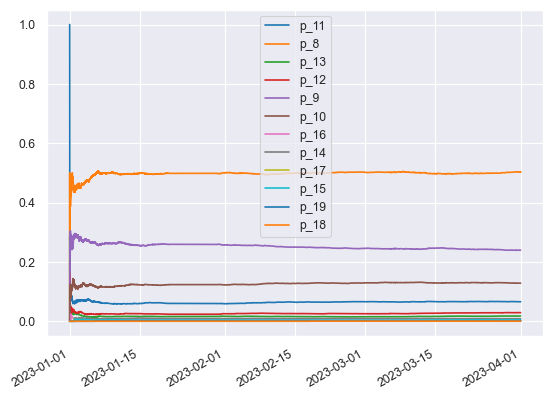

In [34]:
fig = plt.figure(figsize=(20, 4))

tmp = ta.ttl_models['2001:760:4205:254::12'].to_frame()

probs = tmp[filter(lambda x: x.startswith('p') , tmp.columns)]
probs.plot()

In [62]:
informations = probs.apply(lambda x: x*np.log(x))

/home/msi/miniconda3/envs/stats/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

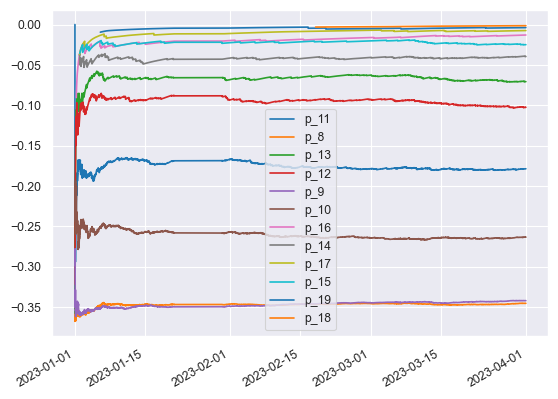

In [63]:
informations.plot()

<AxesSubplot: >

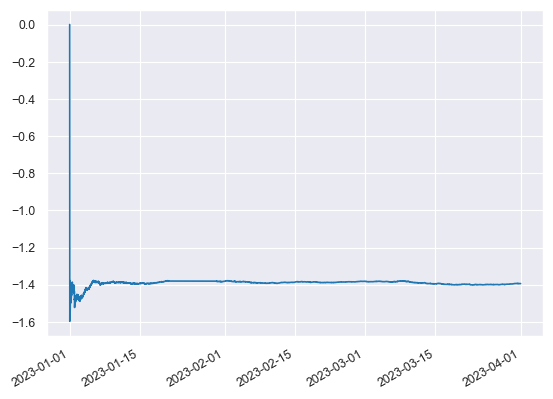

In [64]:
informations.sum(axis=1).plot()

In [65]:
informations['sum_e'] = informations.sum(axis=1)

In [66]:
informations['e_p'] = np.nan

In [82]:
tmp['expected'] = np.nan

In [83]:
for i,x in tmp['ttls'].items():
    print(i,x)
    informations.loc[i, 'e_p'] = np.median(informations.loc[i, f'p_{x}'])
    tmp.loc[i, 'expected'] = tmp.loc[i, f'p_{x}']

2023-01-01 00:00:17 11
2023-01-01 00:08:52 8
2023-01-01 00:11:05 11
2023-01-01 00:20:52 13
2023-01-01 00:22:21 8
2023-01-01 00:27:44 12
2023-01-01 00:31:11 9
2023-01-01 00:39:02 8
2023-01-01 00:39:54 8
2023-01-01 00:53:30 9
2023-01-01 00:59:36 8
2023-01-01 01:00:20 8
2023-01-01 01:09:46 8
2023-01-01 01:10:23 9
2023-01-01 01:18:08 8
2023-01-01 01:22:22 9
2023-01-01 01:29:46 8
2023-01-01 01:31:51 9
2023-01-01 01:38:24 8
2023-01-01 01:40:49 10
2023-01-01 01:48:08 10
2023-01-01 01:50:26 8
2023-01-01 01:57:24 9
2023-01-01 02:02:16 11
2023-01-01 02:08:28 11
2023-01-01 02:09:07 8
2023-01-01 02:20:59 8
2023-01-01 02:22:03 9
2023-01-01 02:27:20 9
2023-01-01 02:33:03 8
2023-01-01 02:39:26 9
2023-01-01 02:41:37 8
2023-01-01 02:50:03 8
2023-01-01 02:51:05 9
2023-01-01 02:58:49 10
2023-01-01 03:00:57 9
2023-01-01 03:08:35 9
2023-01-01 03:09:18 8
2023-01-01 03:18:36 8
2023-01-01 03:22:55 9
2023-01-01 03:27:54 10
2023-01-01 03:29:35 10
2023-01-01 03:38:37 11
2023-01-01 03:40:41 8
2023-01-01 03:46:52 

In [68]:
informations.sample(n=10).sort_index()

,p_11,p_8,p_13,p_12,p_9,p_10,p_16,p_14,p_17,p_15,p_19,p_18,sum_e,e_p
2023-01-05 16:20:20,-0.179459,-0.348924,-0.060254,-0.088376,-0.351647,-0.256496,-0.021772,-0.038096,-0.014268,-0.021772,NaN,NaN,-1.381065,-0.256496
2023-01-11 08:10:56,-0.166319,-0.348004,-0.065494,-0.091706,-0.351852,-0.254411,-0.024363,-0.040789,-0.013745,-0.024363,-0.006325,NaN,-1.387371,-0.254411
2023-01-16 14:59:27,-0.173130,-0.347649,-0.067138,-0.091745,-0.349086,-0.257421,-0.023232,-0.045796,-0.011232,-0.021636,-0.005143,NaN,-1.393207,-0.173130
2023-02-01 15:40:12,-0.167833,-0.346264,-0.067333,-0.092974,-0.349117,-0.257389,-0.019547,-0.040970,-0.010968,-0.022185,-0.004287,NaN,-1.378866,-0.346264
2023-02-03 00:19:44,-0.167825,-0.347040,-0.066525,-0.093729,-0.349286,-0.259065,-0.020313,-0.041991,-0.010664,-0.022841,-0.004165,NaN,-1.383443,-0.022841
2023-02-08 01:47:18,-0.171838,-0.347654,-0.066083,-0.097610,-0.348492,-0.260295,-0.019516,-0.042740,-0.009613,-0.021779,-0.003744,NaN,-1.389363,-0.347654
2023-03-13 16:27:44,-0.180680,-0.347302,-0.066147,-0.096737,-0.345035,-0.264546,-0.013804,-0.042180,-0.007688,-0.023352,-0.004641,-0.002087,-1.394199,-0.347302
2023-03-16 02:59:49,-0.179035,-0.347455,-0.067192,-0.097776,-0.345519,-0.264162,-0.014309,-0.041487,-0.008648,-0.022723,-0.004397,-0.001976,-1.394681,-0.264162
2023-03-22 08:27:28,-0.179977,-0.347212,-0.069484,-0.100398,-0.343589,-0.265570,-0.014745,-0.040850,-0.008223,-0.025202,-0.003874,-0.001737,-1.400860,-0.343589
2023-03-27 03:36:53,-0.180200,-0.346814,-0.069299,-0.101568,-0.343132,-0.265209,-0.014029,-0.040892,-0.008081,-0.024041,-0.004159,-0.001589,-1.399012,-0.346814


In [77]:
e = informations.drop(columns=['sum_e', 'e_p']).min(axis=1, skipna=True)

<AxesSubplot: >

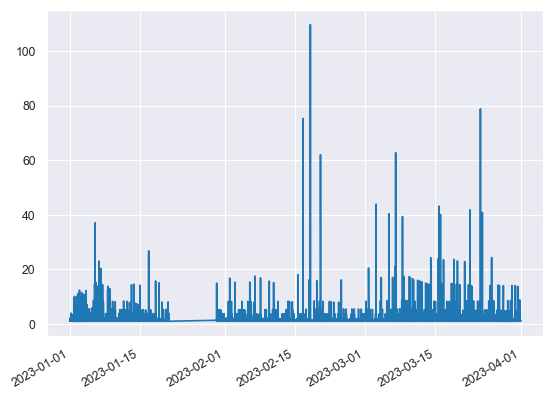

In [80]:
(e/informations['e_p']).plot()

In [97]:
x=((probs.max(axis=1)/tmp['expected']).apply(np.log))#.plot()

In [98]:
from trct.models import NormalModel

In [99]:
nm = NormalModel('u', 'v')
for i, v in enumerate(x):
    nm.log(i,v)

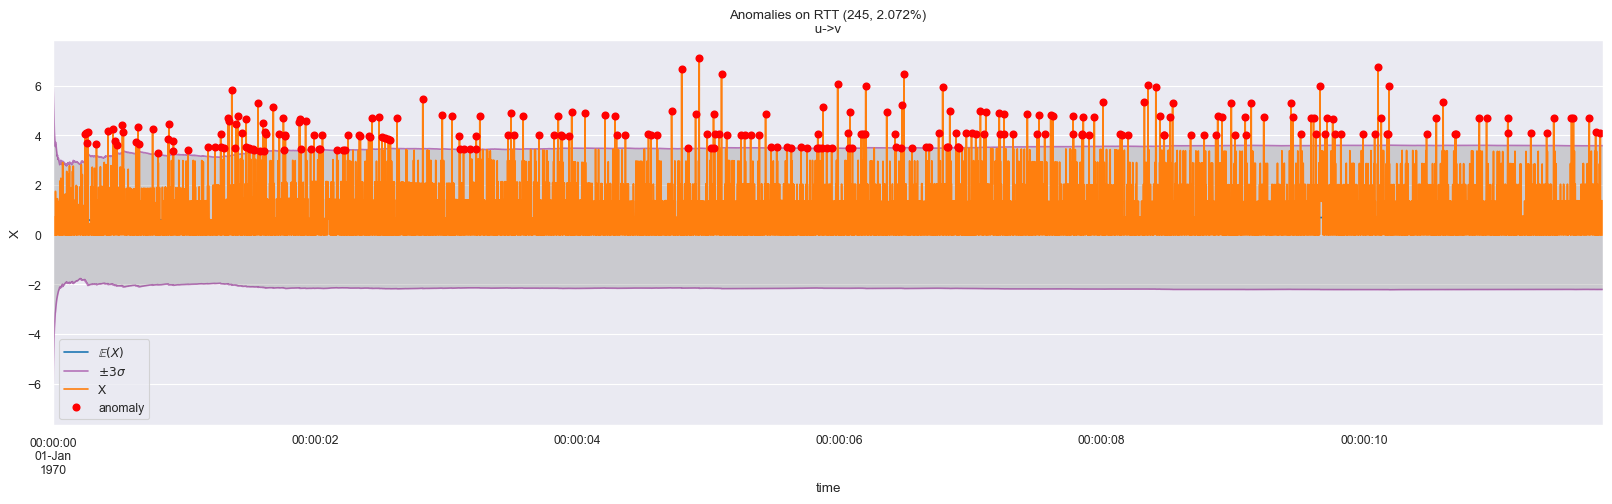

In [100]:
fig  = plt.figure(figsize=(20, 5))
nm.plot(fig.gca())

In [107]:
xxxx = nm.to_frame().reset_index()
xxx = xxxx[xxxx['anomalies']]

In [109]:
xxx.index

Index([  246,   254,   260,   265,   332,   421,   458,   473,   488,   530,
       ...
       11097, 11098, 11273, 11394, 11448, 11584, 11599, 11720, 11768, 11804], dtype='int64', length=245)

In [124]:
tmp['marked'] = False

In [126]:
tmp.columns

Index(['ttls', 'p_11', 'p_8', 'p_13', 'p_12', 'p_9', 'p_10', 'p_16', 'p_14', 'p_17', 'p_15', 'p_19', 'p_18', 'var_p_11', 'var_p_8', 'var_p_13', 'var_p_12', 'var_p_9', 'var_p_10', 'var_p_16', 'var_p_14', 'var_p_17', 'var_p_15', 'var_p_19', 'var_p_18', 'm_11', 'm_8', 'm_13', 'm_12', 'm_9', 'm_10', 'm_16', 'm_14', 'm_17', 'm_15', 'm_19', 'm_18', 'n_11', 'n_8', 'n_13', 'n_12', 'n_9', 'n_10', 'n_16', 'n_14', 'n_17', 'n_15', 'n_19', 'n_18', 'anomalies', 'anomalies_y', 'u', 'v', 'total', 'expected', 'marked'], dtype='object')

In [127]:
tmp.iloc[xxx.index, -1] = True

In [130]:

tmp['marked'].value_counts()

marked
False    11580
True       245
Name: count, dtype: int64

In [134]:
tmp[['ttls', 'marked']].plot(kind='scatter', y='ttls', color='marked' )

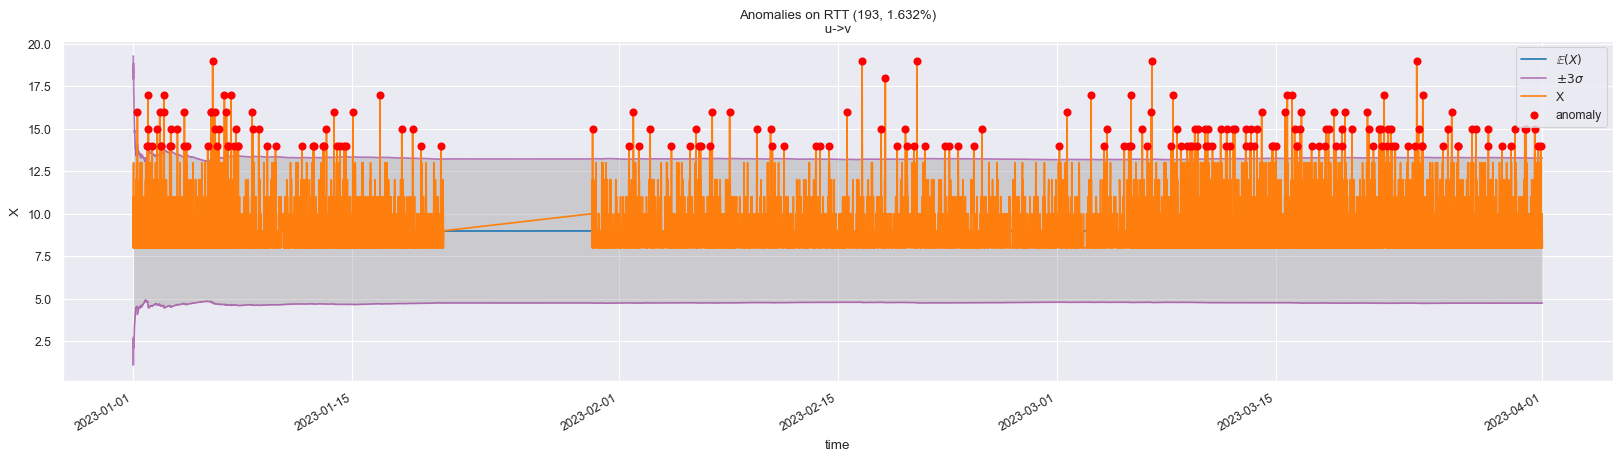

In [153]:
fig = plt.figure(figsize=(20, 5))
nm2.plot(fig.gca())

2a00:139c:5:585::3


None

2001:1458:302:38::1


None

2001:1458:302:27::2


None

2001:760:ffff:110::25


None

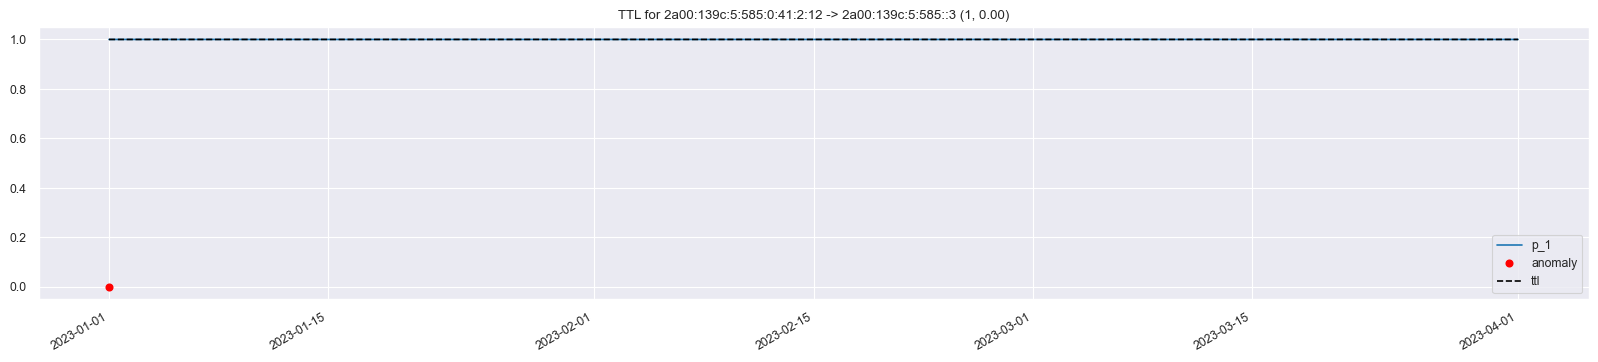

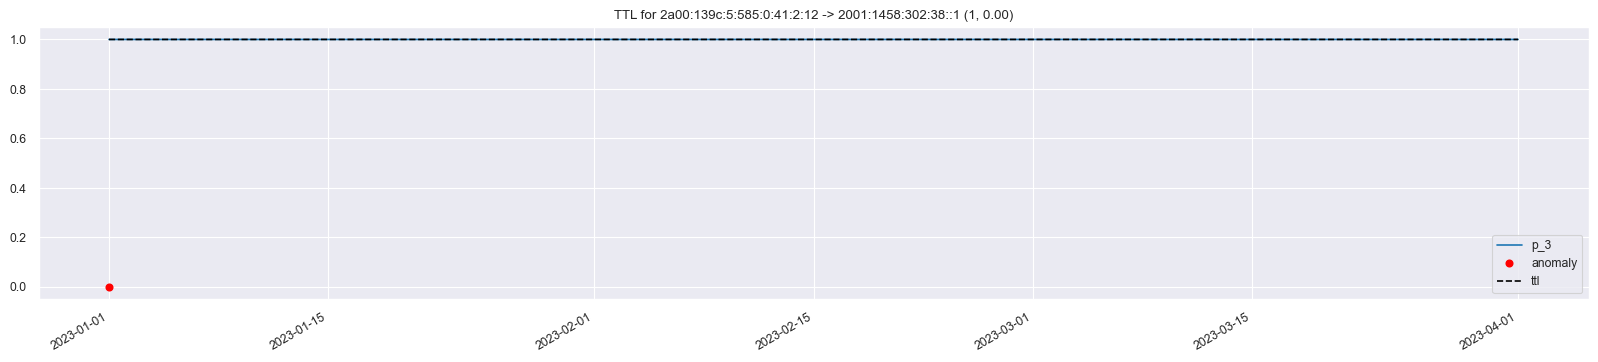

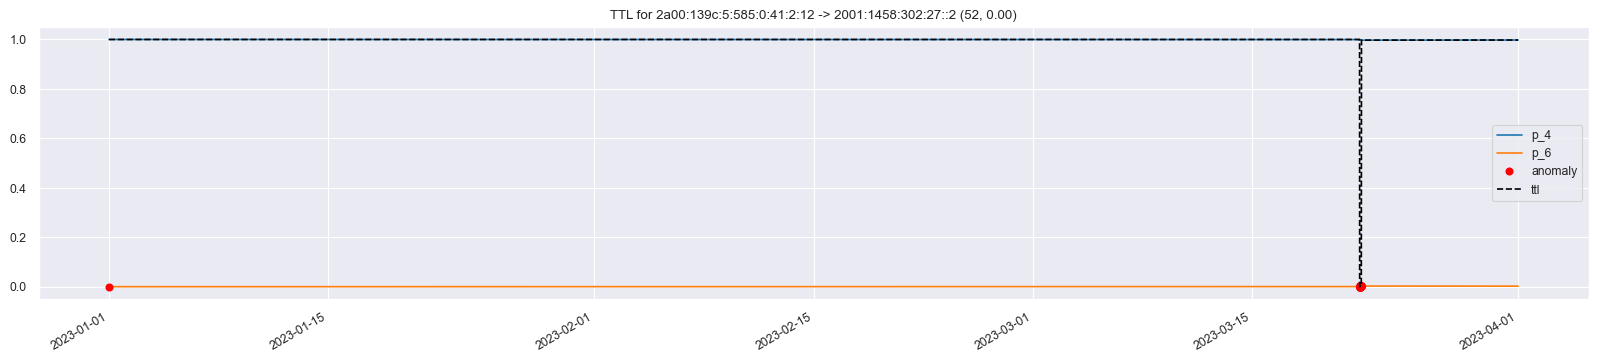

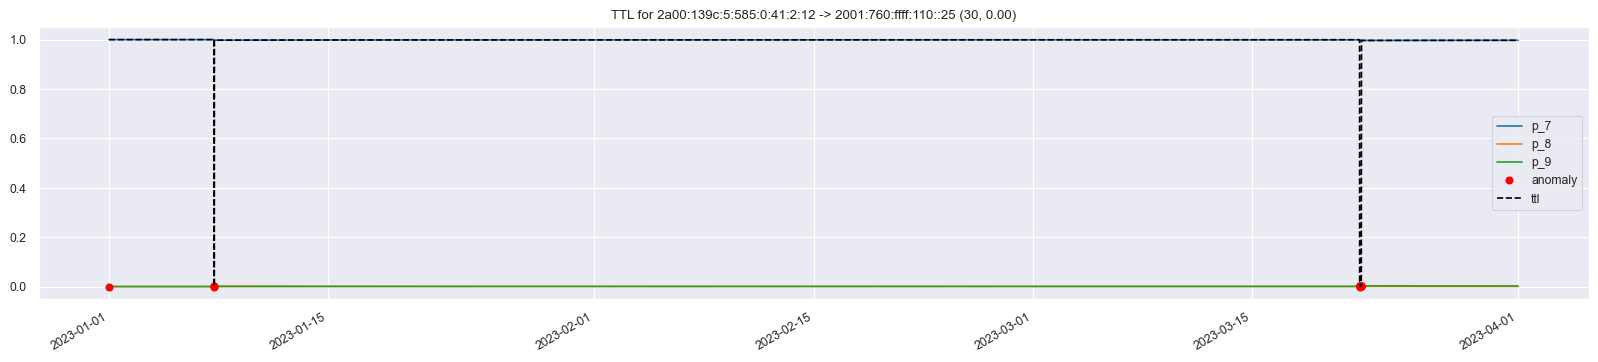

In [17]:
ctr = 0
for i, x in ta.ttl_models.items():
    if ctr==4:
        break
    print(i)
    fig = plt.figure(figsize=(20, 4))
    display(x.plot(plt.gca()))
    ctr+=1

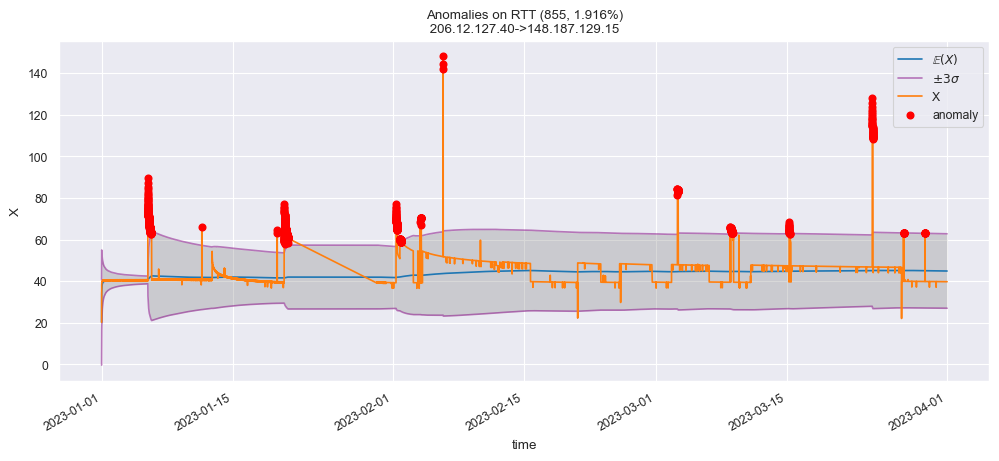

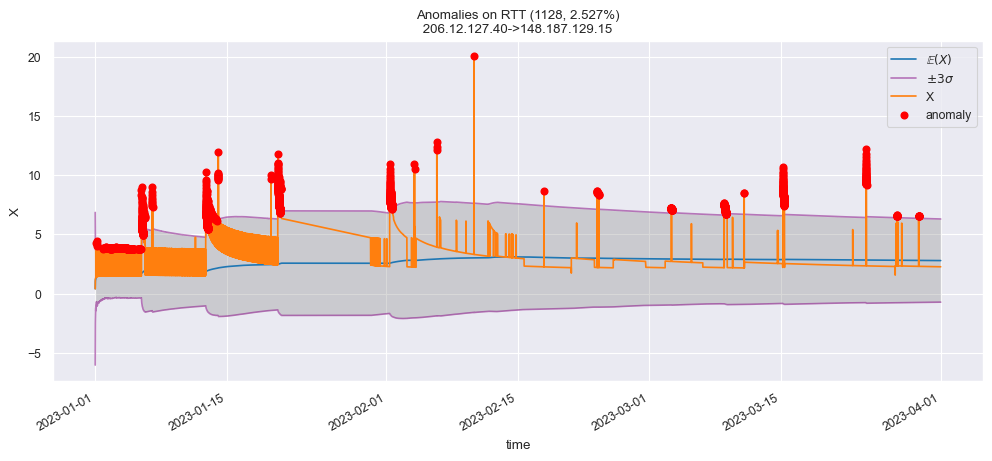

In [ ]:
# fig, (ax1, ax2) = plt.subplots( 2, 1, figsize=(12, 5))
fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
ta.hops_ip_model.global_anomaly_model.plot(ax)

fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
ta.hops_ip_model.local_anomaly_model.plot(ax)

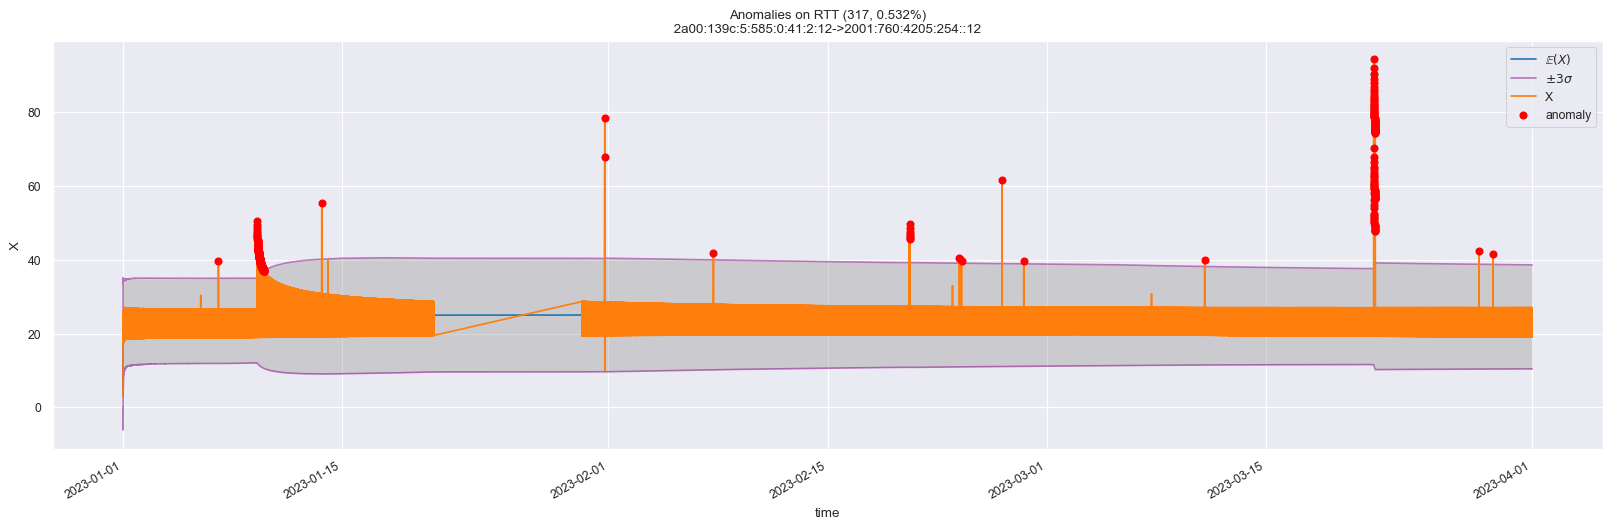

In [ ]:
fig=plt.figure(figsize=(20, 6))
ta.hops_ip_model.weighted_anomaly_model.plot(plt.gca())

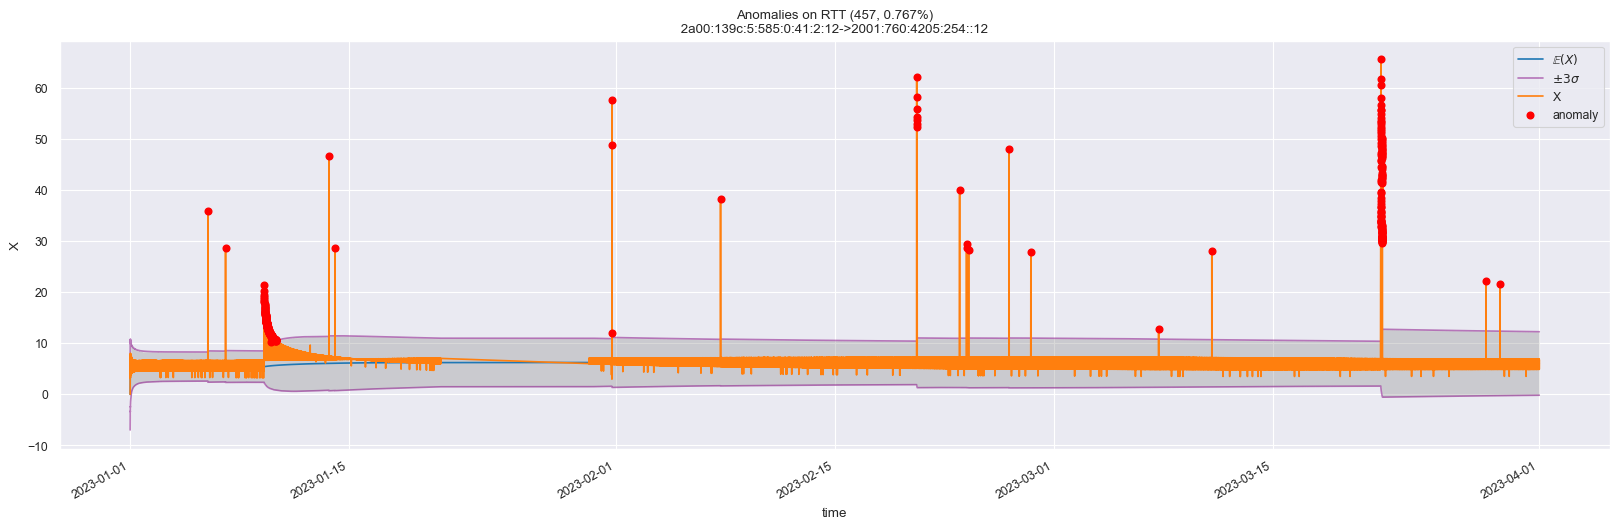

In [ ]:
fig=plt.figure(figsize=(20, 6))
ta.hops_ip_model.node_prob_edge_prob.plot(plt.gca())

In [ ]:
s = np.array(ta.hops_ip_model.weighted_probs)

/tmp/ipykernel_5622/145979019.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(s))


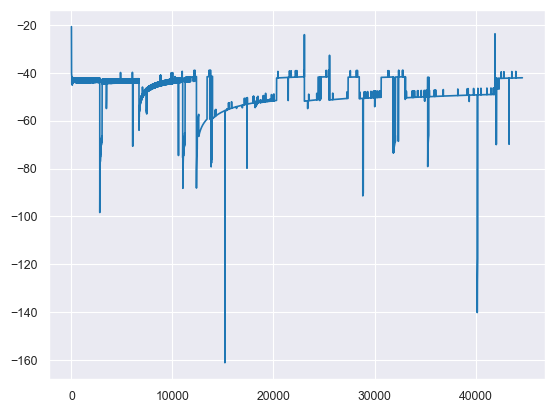

In [ ]:
plt.plot(np.log(s))

In [ ]:
df_paths = ta.hops_ip_model.to_frame()

In [1]:
# ta.hops_ip_model.plot_graph(plt.gca(), node_layout=final_pos2)

<AxesSubplot: xlabel='paths'>

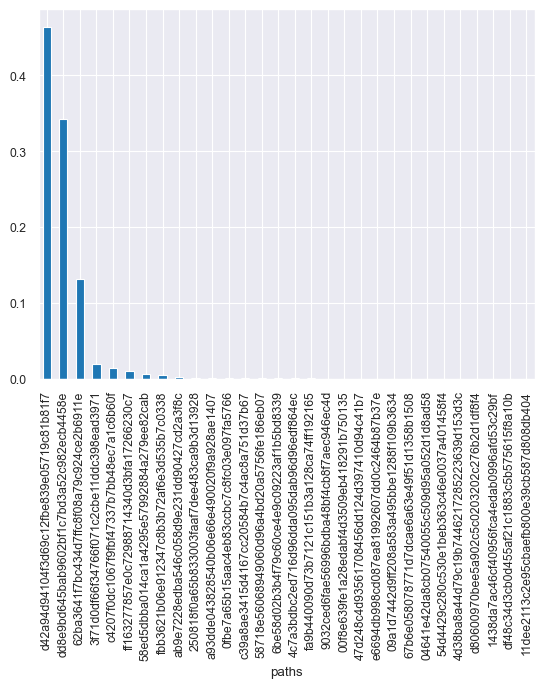

In [ ]:

(df_paths.groupby('paths').size().sort_values(ascending=False)/df_paths.shape[0]).plot(kind='bar')

In [ ]:
N=10

In [ ]:

paths = df_paths.groupby('paths').size().sort_values(ascending=False).head(N).index.tolist()

In [ ]:
mapper = { v:f'top {i+1}' for i, v in enumerate(df_paths.groupby('paths').size().sort_values(ascending=False).rank().index.tolist())}

In [ ]:
df_paths[df_paths['paths'].isin(paths)]['paths'].unique()

array(['62ba3641f7bc434d7ffc8f08a79c924ce2b6911e',
       'c4207f0dc1067f9fbf47337b7bb48ec7a1c6b60f',
       'fbb3621b06e912347c8b3b72af6e3d535b7c0338',
       'dd8e9bd645bab9602bf1c7bd3a52c982ecb4458e',
       'ff163277857e0c72988714340d3bfa17266230c7',
       '3f71d0df66f34766f071c2cbe11ddc398ead3971',
       'd42a94d94104f3d69c12fbe839e05719c81b81f7',
       '250818f0a65b833003faaf7dee483ca9b3d13928',
       '58ed5dbba014ca1a4295e57992884a279ee82cab',
       'ab9e7228edba546c058d9e231dd90427cd2a3f8c'], dtype=object)

<AxesSubplot: >

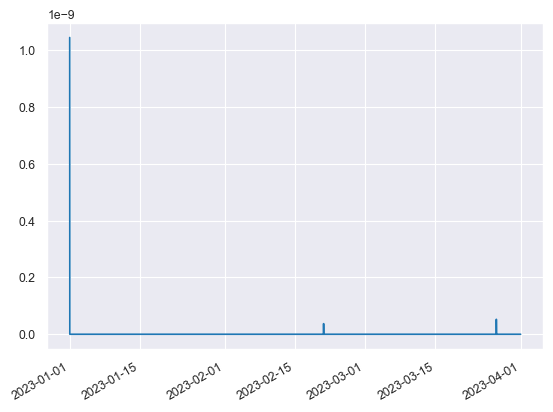

In [ ]:
df_paths['weighted_probs'].apply(lambda x: )

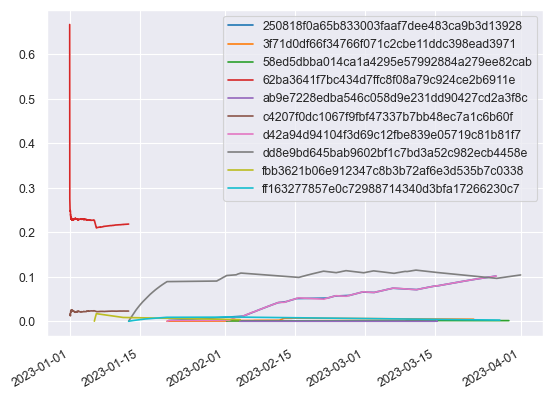

In [ ]:
df_paths[df_paths['paths'].isin(paths)].groupby('paths')['local_probs'].plot()
plt.legend()
# plt.legend([mapper[x] for x in df_paths[df_paths['paths'].isin(paths)]['paths'].unique()], )

In [ ]:
ta.ttl_models

In [ ]:
with open(files[43456], "r") as f:
    json_data = json.load(f)

In [ ]:
node_colors = defaultdict(lambda : 'blue')

In [ ]:
path = [ta.hops_ip_model.node_to_index[x] for x in json_data['hops']] + [0]

for node in g.nodes:
    node_colors[node] = 'blue'

for node in path:
    node_colors[node] = 'red'

node_colors[ta.hops_ip_model.node_to_index['206.12.127.40']] = 'green'
node_colors[ta.hops_ip_model.node_to_index['148.187.129.15']] =  'green'

In [ ]:

#TODO add hash of path to df

In [ ]:
node_sizes = defaultdict(lambda : 1)

data = np.array(list(ta.hops_ip_model.node_in_counts.values()))   

mx = data.max()
mn = data.min()

for k, v in ta.hops_ip_model.node_out_counts.items():
    node_sizes[ta.hops_ip_model.node_to_index[k]] = ((v-mn)/(mx-mn))*2

In [ ]:

fig=plt.figure(figsize=(20, 20))
ng.Graph(
        g,
        layout='dot',
        arrows=True,
        weighted=True,
        node_color={x:node_colors[x] for x in g.nodes}, # TODO: this based on src/dest/normal
        # node_edge_color=clors,
        node_labels={x: i for i, x in enumerate(g.nodes)},
        # node_shape={x: tier_mapping[x] for x in graph.nodes},  # so^>v<dph8
        edge_cmap="RdYlGn",
        # node_colors=node_colors,
        # edge_colors=node_colors,
        node_size={x:node_sizes[x] for x in g.nodes},
        node_layout=final_pos2,
            
            )

NameError: name 'g' is not defined

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# ta.plot()

In [ ]:
from trct.models import NormalModel

In [ ]:
max_data = (np.array(ta.ttl_models["148.187.129.15"].most_probable_ttl))


In [ ]:
m = ta.ttl_models["148.187.129.15"]

In [ ]:
df = m.to_frame()

In [ ]:
tmp = df.reset_index()
c=tmp[tmp['anomalies']]['anomalies'].index.tolist()

Text(0.5, 1.0, 'Outliers = 0.04927679453777738')

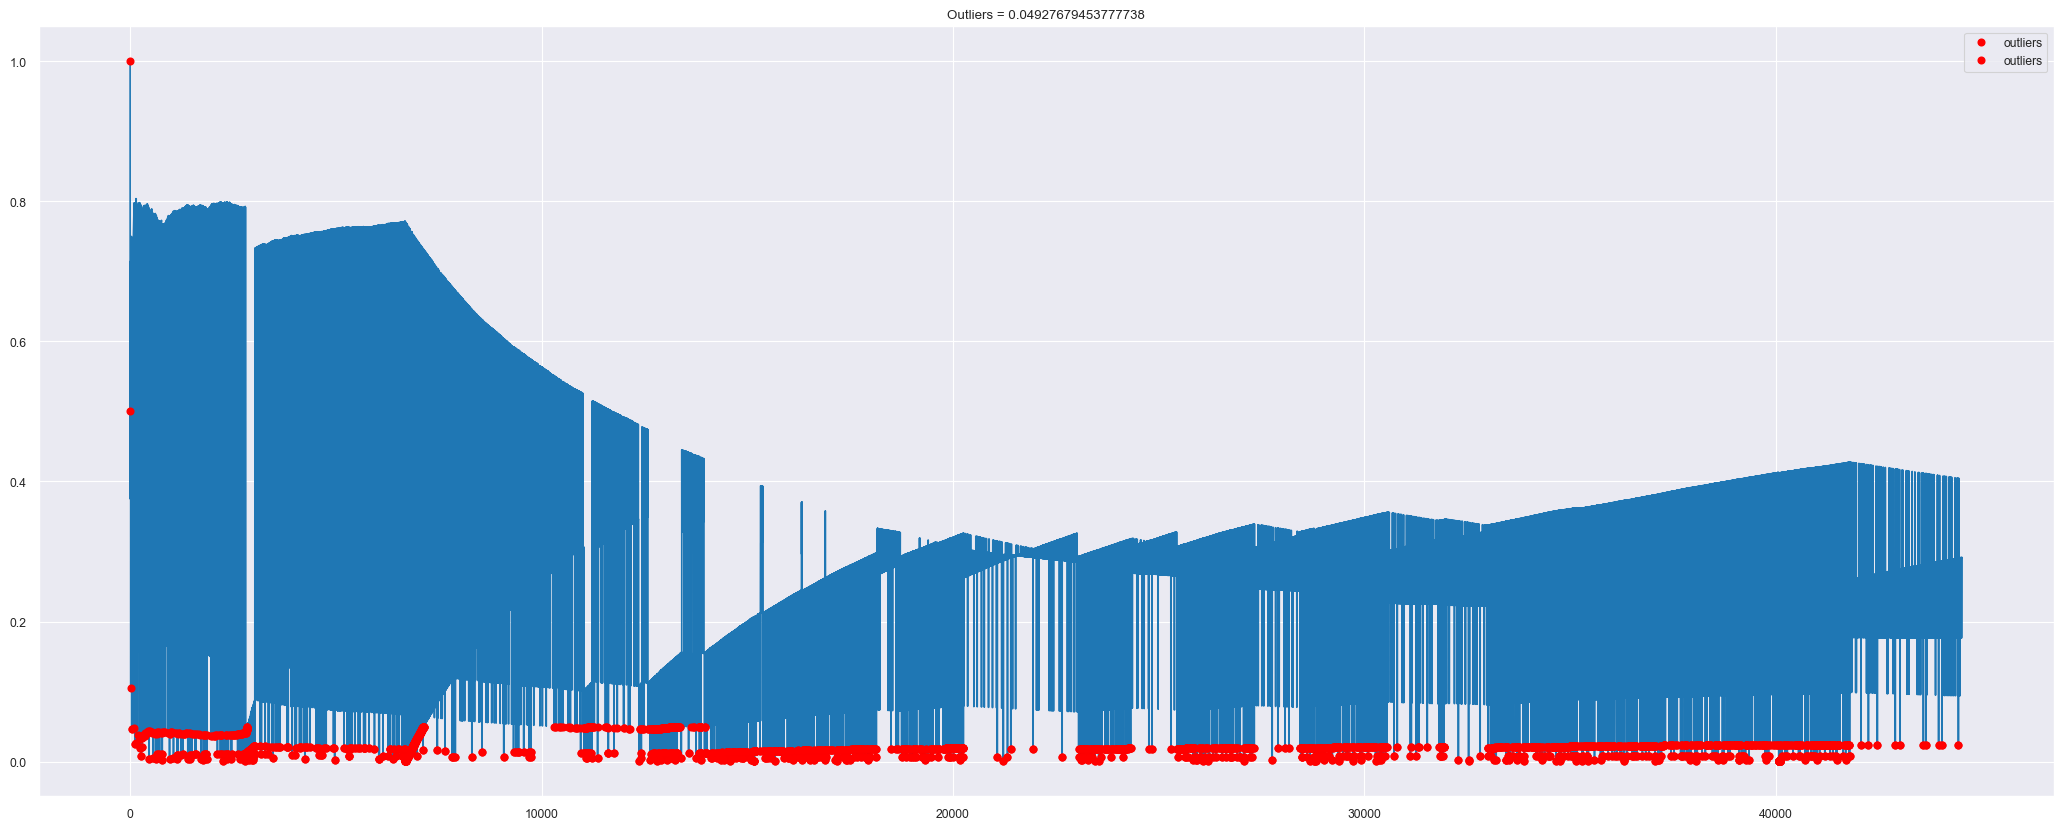

In [ ]:
fig = plt.figure(figsize=(26, 10))
max_data = (np.array(ta.ttl_models["148.187.129.15"].ttl_prob))
plt.plot(max_data)
index = np.where(max_data < 0.05)
plt.plot(index[0], max_data[index], 'ro', label="outliers")
plt.plot(c, max_data[c], 'ro', label="outliers")
plt.legend()
plt.title(f"Outliers = {len(index[0])/len(max_data)}")

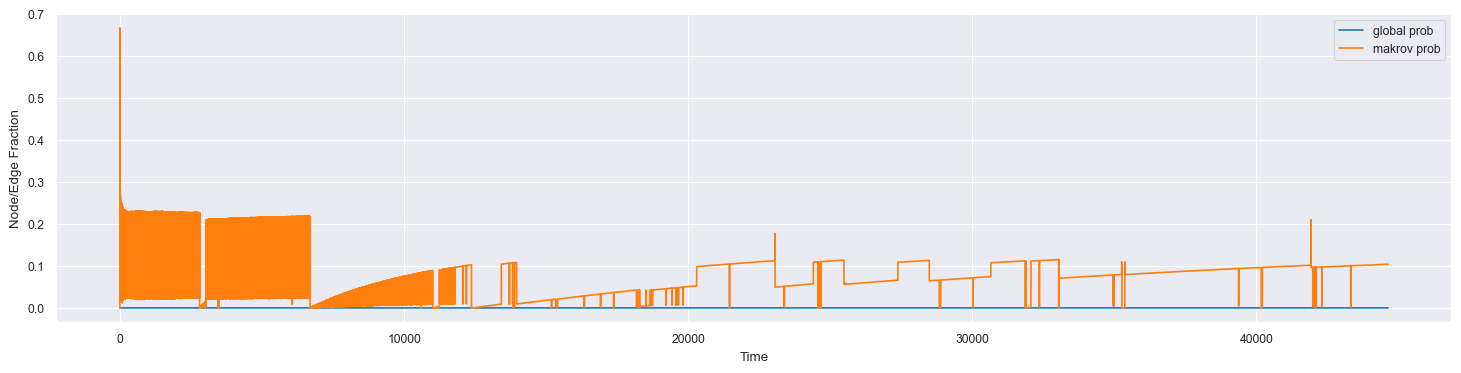

In [ ]:
fig = plt.figure(figsize=(18, 4))
ax = plt.gca()
ta.hops_ip_model.plot(ax)
ax.legend()

In [ ]:
tmp = ta.hops_ip_model.to_frame()

In [ ]:
ts, path = zip(*ta.hops_ip_model.unique_paths)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
x = pd.DataFrame({'path': path, 'ts':pd.to_datetime(ts, unit='ms')})

In [ ]:
cc = x.groupby('path').agg({'ts': ['min', 'max']})

In [ ]:
from trct.models import NormalModel

In [ ]:
m = NormalModel(src, dest, )

In [ ]:
tmp['local_probs'].plot()

In [ ]:
m = NormalModel(src, dest, alpha_0=0.5, mu_0=3, sigma_0=1)

for i,x in tmp['global_probs'].apply(np.log).items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
ax =fig.gca()
m.plot(ax)
ax.set_title("Normal Model")

In [ ]:
m = NormalModel(src, dest, alpha_0=0.5, mu_0=3, sigma_0=1)

for i,x in tmp['local_probs'].apply(np.log).items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
m = NormalModel(src, dest, alpha_0=0.5, mu_0=3, sigma_0=1)

for i,x in tmp['local_probs'].apply(np.log).items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
m = NormalModel(src, dest, alpha_0=1, mu_0=20, sigma_0=1)

for i,x in tmp['global_probs'].apply(np.log).items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
m = NormalModel(src, dest, alpha_0=3, mu_0=0, sigma_0=1)
 
for i,x in tmp['local_probs'].apply(np.log).diff().clip(-np.inf, 1).items(): #diff    
    if(np.isnan(x)):
        continue
    
    m.log(i.timestamp()*1000, -x)
fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
m = NormalModel(src, dest, alpha_0=3, mu_0=20, sigma_0=1)

for i,x in tmp['global_probs'].apply(np.log).diff().items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
tmp['local_probs'].plot()

In [ ]:
fig = plt.figure(figsize=(22, 4))
fig.gca().xaxis.set_label("p")
# (tmp['global_probs'] / tmp['local_probs']).diff().plot(ax=fig.gca())
x=(tmp['local_probs'])
x.plot(ax=fig.gca())
# (tmp['global_probs']-tmp['local_probs']).diff().plot(ax=fig.gca())
# (tmp['global_probs']).diff().plot(ax=fig.gca())
# (tmp['local_probs']).plot(ax=fig.gca())
# plt.plot(cc['ts']['min'], [0]*len(cc), 'o')
# plt.plot(cc['ts']['max'], [0]*len(cc), '>')
# (tmp['local_probs'][tmp['local_probs']<0.025]).plot(ax=fig.gca(), style='x')
# tmp[tmp['weighted_probs']<0.05]['weighted_probs'].plot(ax=fig.gca(), style='x')
x[x<(0.05)].plot(ax=fig.gca(), style='x', c='r')
# print(tmp[tmp['weighted_probs']<0.05]['weighted_probs'].shape)
print(x[x<(0.05)].shape[0]/x.shape[0])
# todo try path entropy

In [ ]:
fig = plt.figure(figsize=(22, 4))
fig.gca().xaxis.set_label("p")
# (tmp['global_probs'] / tmp['local_probs']).diff().plot(ax=fig.gca())
x=((tmp['global_probs']))
x.plot(ax=fig.gca())
# (tmp['global_probs']-tmp['local_probs']).diff().plot(ax=fig.gca())
# (tmp['global_probs']).diff().plot(ax=fig.gca())
# (tmp['local_probs']).plot(ax=fig.gca())
# plt.plot(cc['ts']['min'], [0]*len(cc), 'o')
# plt.plot(cc['ts']['max'], [0]*len(cc), '>')
# (tmp['local_probs'][tmp['local_probs']<0.025]).plot(ax=fig.gca(), style='x')
# tmp[tmp['weighted_probs']<0.05]['weighted_probs'].plot(ax=fig.gca(), style='x')
x[x<(0.05)].plot(ax=fig.gca(), style='x', c='r')
# print(tmp[tmp['weighted_probs']<0.05]['weighted_probs'].shape)
print(x[x<(0.05)].shape[0]/x.shape[0])

In [ ]:
fig = plt.figure(figsize=(22, 4))
fig.gca().xaxis.set_label("p")
# (tmp['global_probs'] / tmp['local_probs']).diff().plot(ax=fig.gca())
x=((tmp['weighted_probs']))
x.plot(ax=fig.gca())
# (tmp['global_probs']-tmp['local_probs']).diff().plot(ax=fig.gca())
# (tmp['global_probs']).diff().plot(ax=fig.gca())
# (tmp['local_probs']).plot(ax=fig.gca())
# plt.plot(cc['ts']['min'], [0]*len(cc), 'o')
# plt.plot(cc['ts']['max'], [0]*len(cc), '>')
# (tmp['local_probs'][tmp['local_probs']<0.025]).plot(ax=fig.gca(), style='x')
# tmp[tmp['weighted_probs']<0.05]['weighted_probs'].plot(ax=fig.gca(), style='x')
x[x<(0.0005)].plot(ax=fig.gca(), style='x', c='r')
# print(tmp[tmp['weighted_probs']<0.05]['weighted_probs'].shape)
print(x[x<(0.005)].shape[0]/x.shape[0])